<a href="https://colab.research.google.com/github/aimanmrkhan/Cancer_Data_Analysis/blob/main/Copy_of_pancreatic_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pancreatic Cancer Predicition**

## Importing needed libraries

In [8]:
!pip uninstall -y scikit-learn
!pip uninstall -y pycaret



Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2


In [9]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 18.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.11.1 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [10]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5

In [11]:
import pandas as pd
import pycaret
import seaborn as sns
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from pycaret.classification import *
sns.set()



## Loading Data


In [84]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/aimanmrkhan/Cancer_Data_Analysis/main/urine%20biomarkers%202020%20data_orginal.csv")
df
# CREATING a DATAFRAME from the dataset

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

## Data Preperation

In [14]:
df.diagnosis.value_counts().sort_index()
#Catergorizing the labels

diagnosis
1    183
2    208
3    199
Name: count, dtype: int64

In [15]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


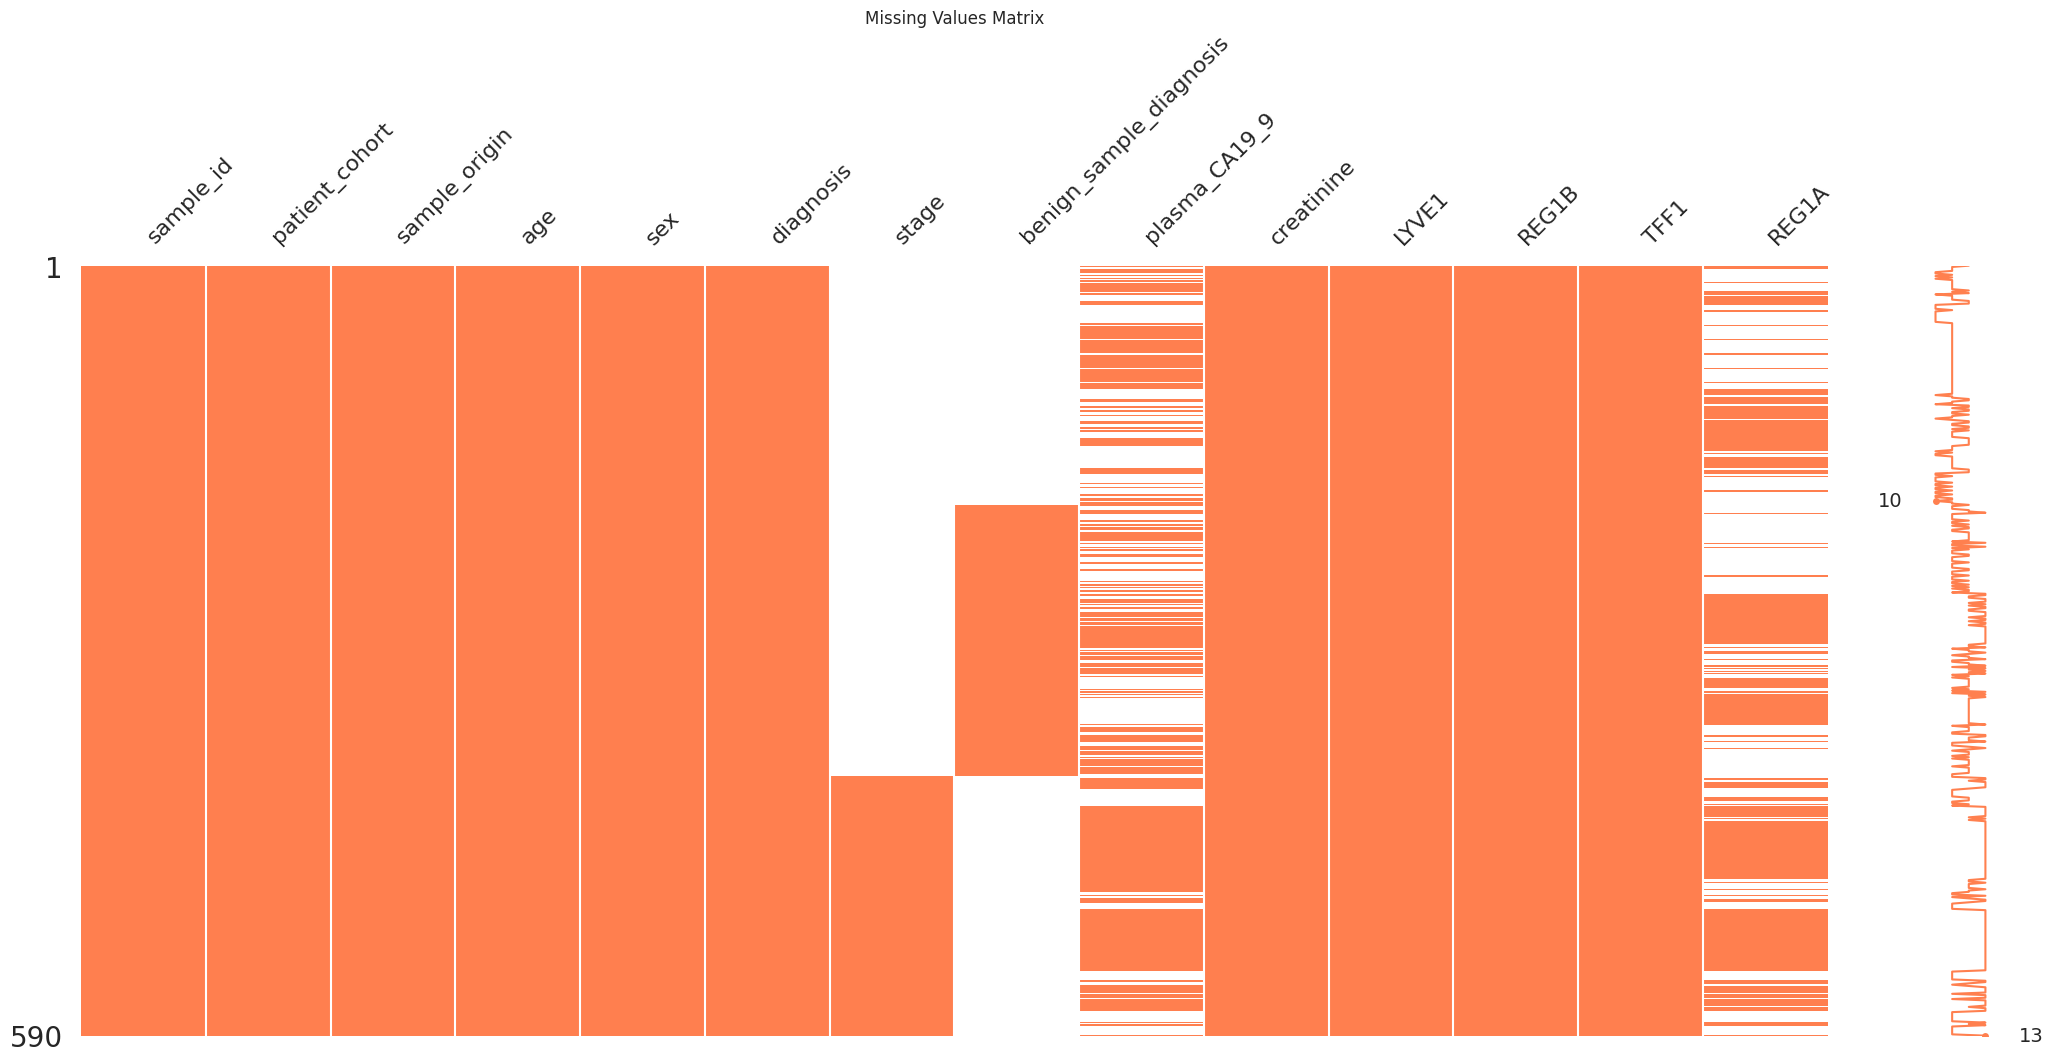

In [16]:
msno.matrix(df, color =(1, 0.5, 0.31))
#color = corol  (1, 0.5, 0.31)
plt.title("Missing Values Matrix")
# to show the missing values in our data
plt.show()

In [17]:
df.shape
# number of rows and columns in the data frame



(590, 14)

### Data Seperation as X and y


In [18]:
y = df['diagnosis']
y
# Lable is set as Y

0      1
1      1
2      1
3      1
4      1
      ..
585    3
586    3
587    3
588    3
589    3
Name: diagnosis, Length: 590, dtype: int64

In [19]:
X = df.drop('diagnosis', axis = 1)
X
#All other columns are features

,sample_id,patient_cohort,sample_origin,age,sex,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


## EDA Methods

### Target variable

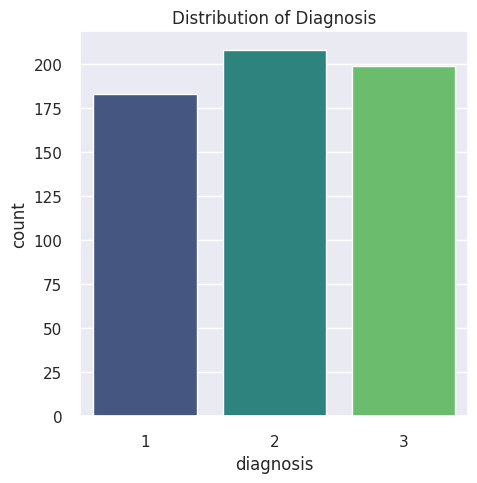

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 5))
sns.countplot(data=df, x='diagnosis', palette='viridis')
plt.title('Distribution of Diagnosis')
plt.show()

### Descriptive statistics of features

In [21]:
print(df.describe())


              age   diagnosis  plasma_CA19_9  creatinine       LYVE1  \
count  590.000000  590.000000     350.000000  590.000000  590.000000   
mean    59.079661    2.027119     654.002944    0.855383    3.063530   
std     13.109520    0.804873    2430.317642    0.639028    3.438796   
min     26.000000    1.000000       0.000000    0.056550    0.000129   
25%     50.000000    1.000000       8.000000    0.373230    0.167179   
50%     60.000000    2.000000      26.500000    0.723840    1.649862   
75%     69.000000    3.000000     294.000000    1.139482    5.205037   
max     89.000000    3.000000   31000.000000    4.116840   23.890323   

             REG1B          TFF1         REG1A  
count   590.000000    590.000000    306.000000  
mean    111.774090    597.868722    735.281222  
std     196.267110   1010.477245   1477.247724  
min       0.001104      0.005293      0.000000  
25%      10.757216     43.961000     80.692000  
50%      34.303353    259.873974    208.538500  
75%     

 Can see quite a outliars like in plasma_ca19_9 we see max value as 31000 with 75% is around 294
**Data set may need CLEANING for outlier removals **


### Missing Values Analysis

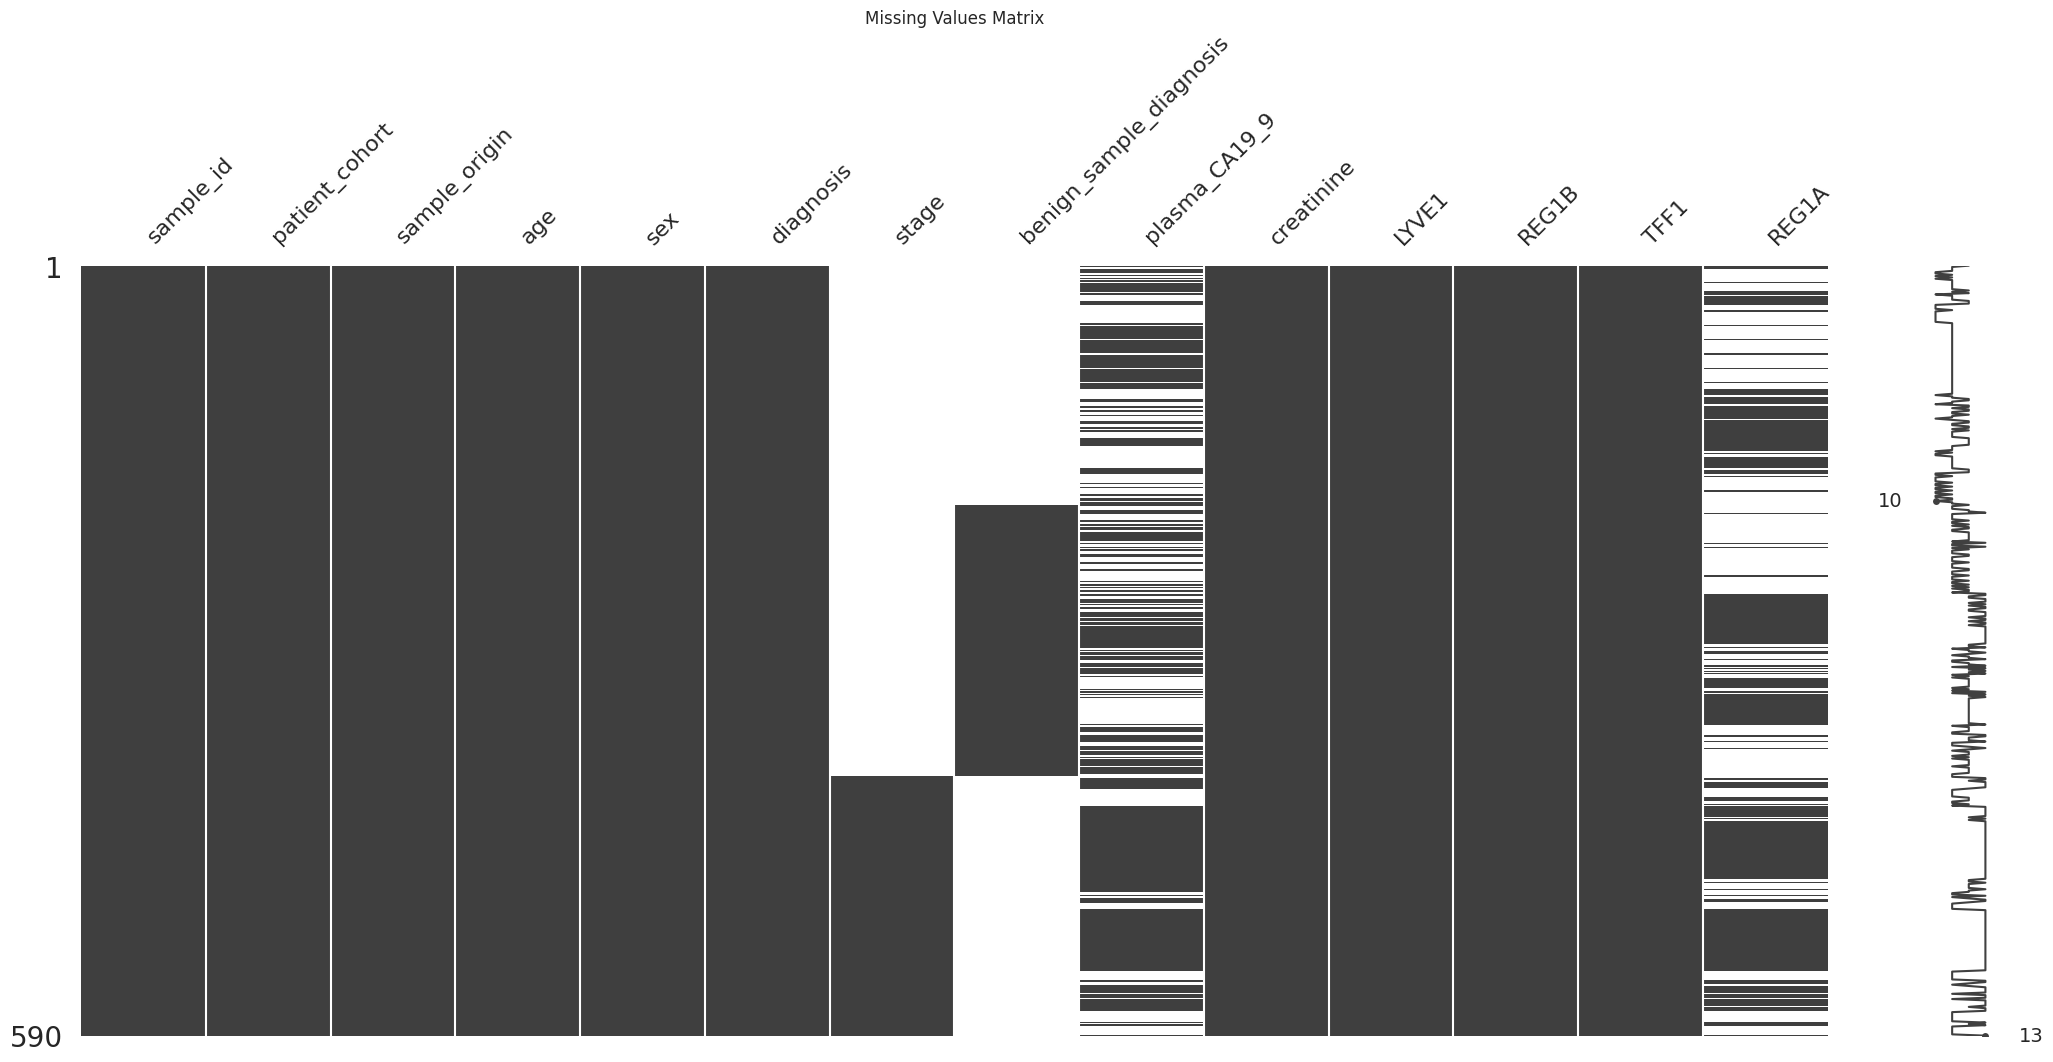

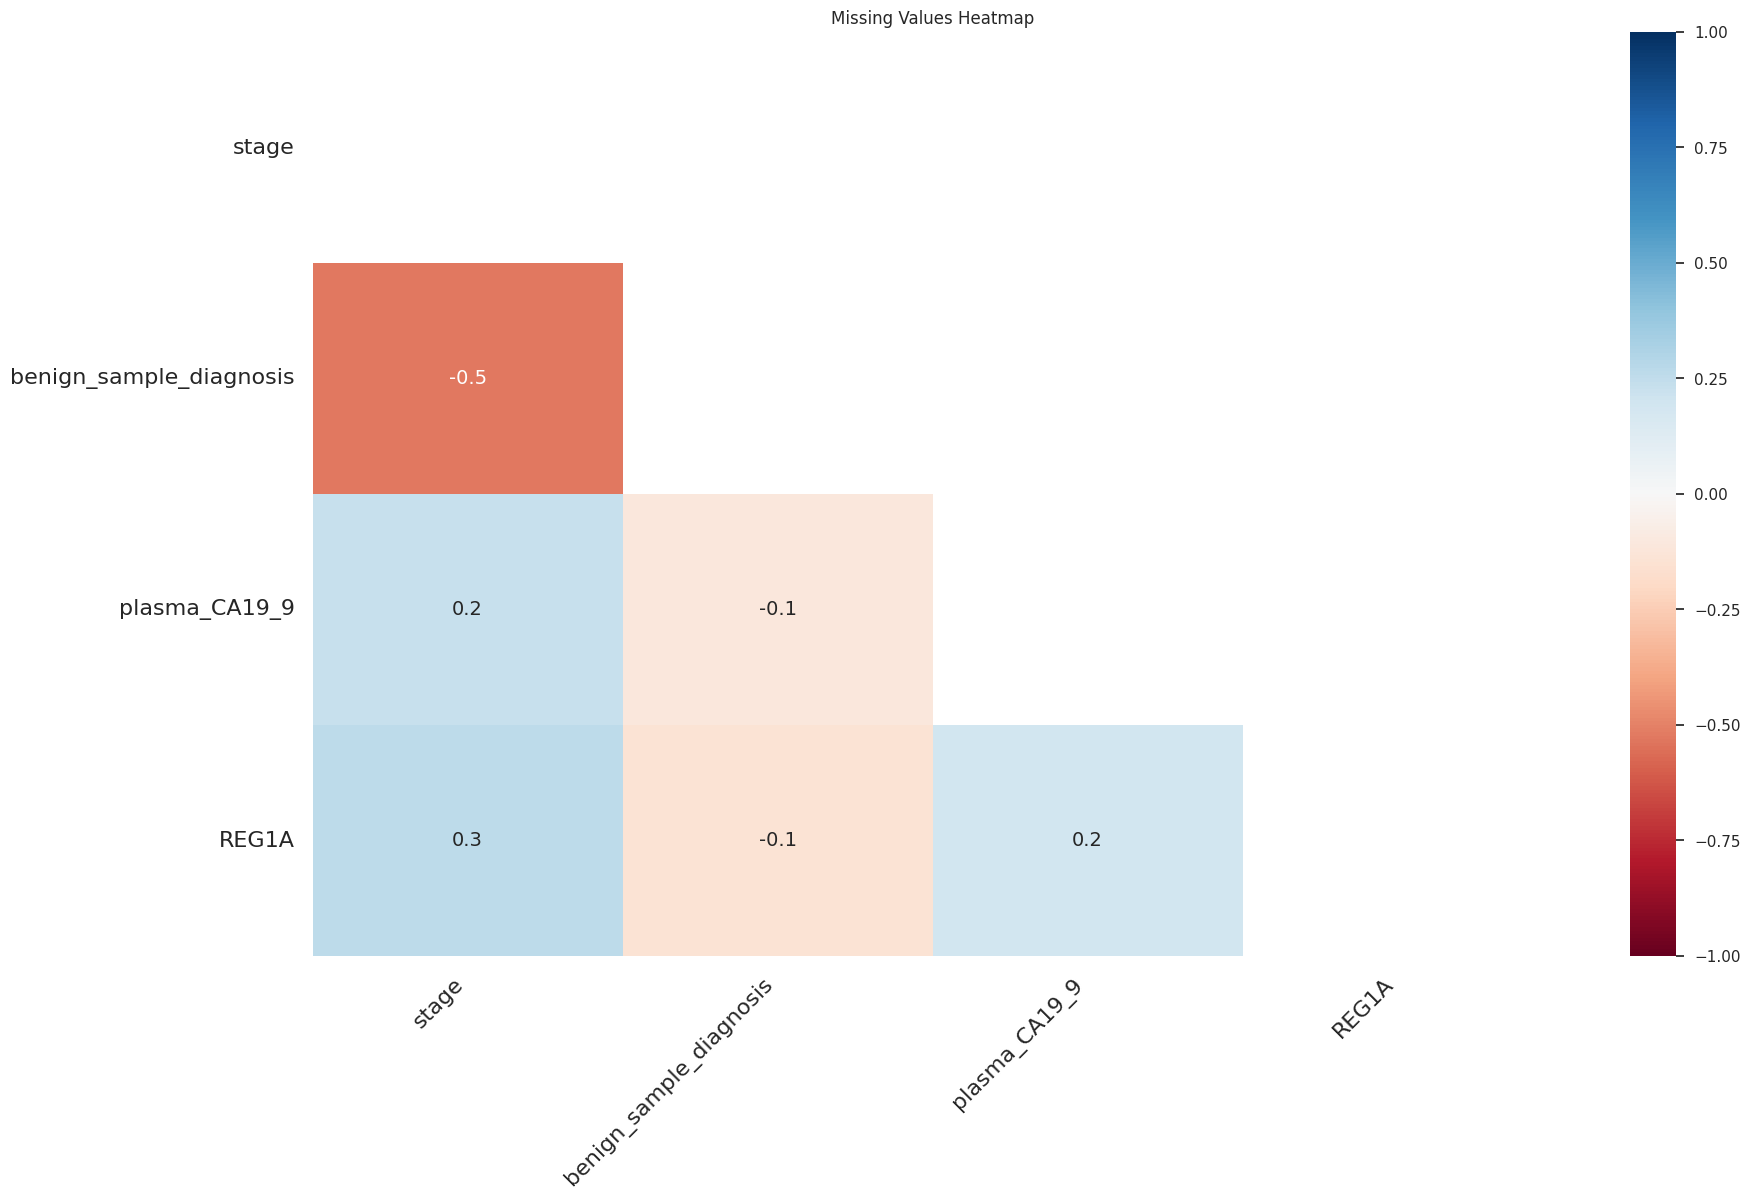

In [22]:
import missingno as msno

msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.show()


Weak correlations ia seen between the null data attributes hence this may suggest little or no relationship between variables. Hence redudency is not a case here . Need to further investigate and work towards data populating options if any needed


### Numerical Features Analysis

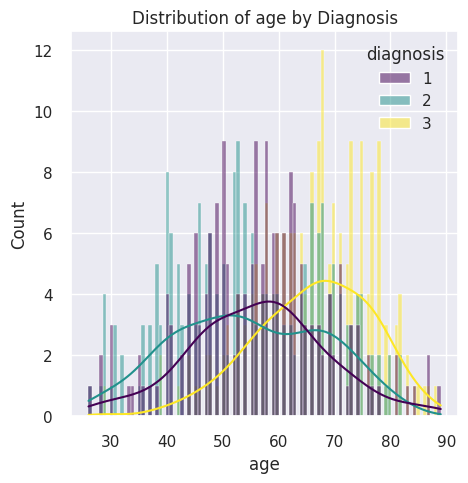

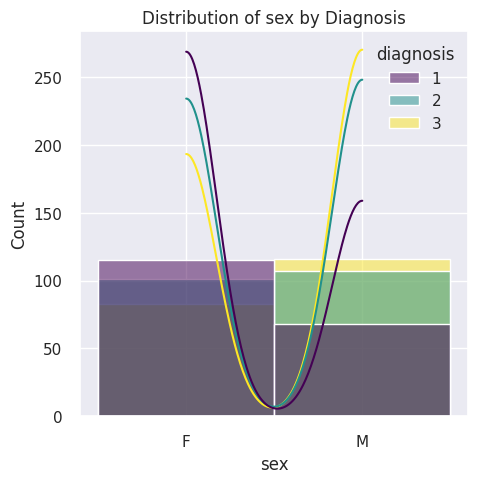

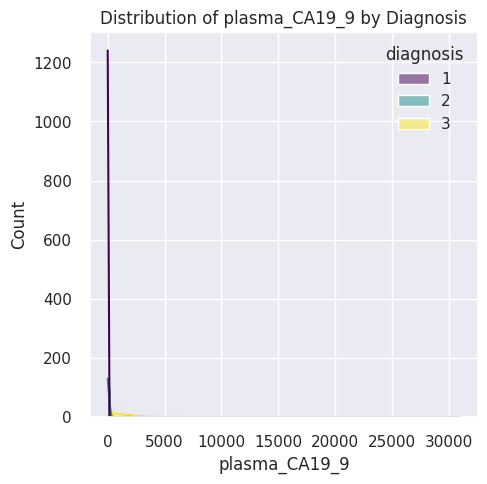

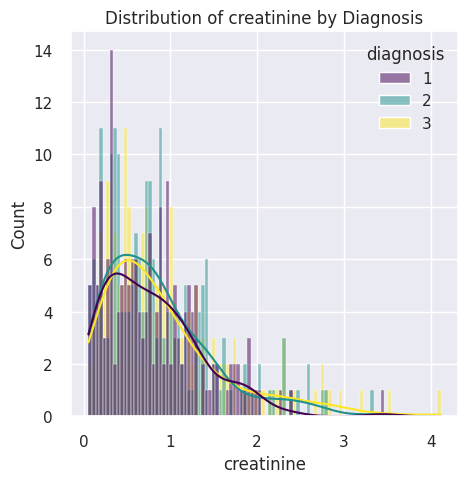

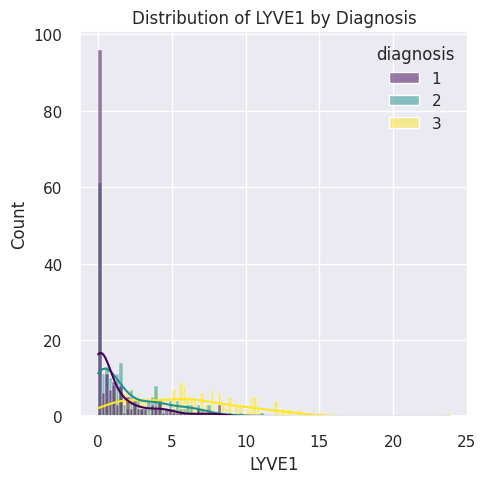

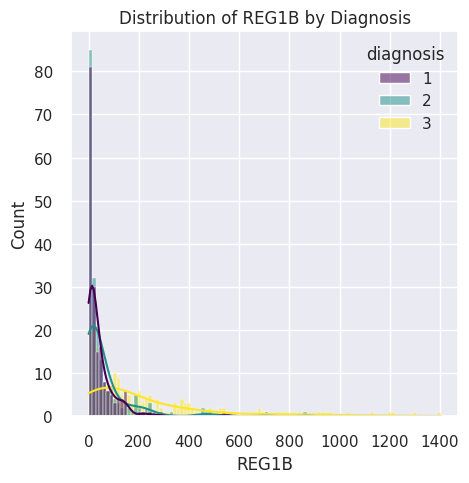

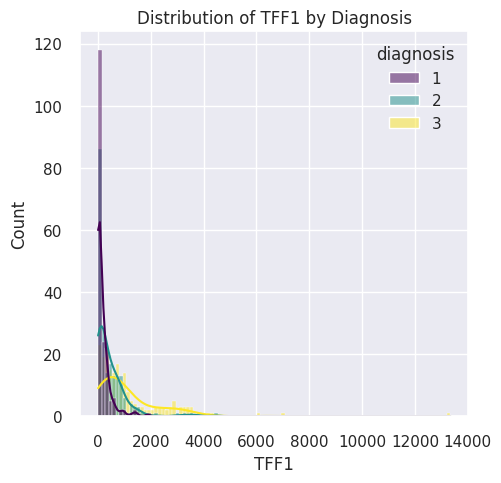

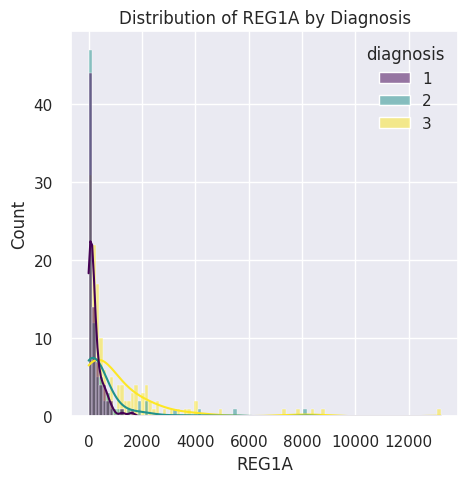

In [23]:

numerical_columns = ['age','sex', 'plasma_CA19_9', 'creatinine', 'LYVE1', 'REG1B', 'TFF1', 'REG1A']
for col in numerical_columns:
    plt.figure(figsize=(5, 5))
    sns.histplot(df, x=col, hue='diagnosis', kde=True, bins=100, palette='viridis')
    plt.title(f'Distribution of {col} by Diagnosis')
    plt.show()

HISTOGRAM PLOT ANALYSIS:

Diagnosis Count by Age:
most diagnoses are in the 60-70 age group, with fewer diagnoses in younger and older age groups

Diagnosis Count by Sex:
By comparing the heights of the bars, you can see how the count of diagnoses differs between males and females. For instance, a taller bar for "Male" would indicate that there were more diagnoses in the male group compared to females in this dataset.

Diagnosis Count vs creatinine :
The graph suggests a positive relation between creatinine levels and the number of diagnoses a patient has.

Diagnosis Count by other attributes/features:
There is no clear linear correlation with the count of diagnoses. The data points are scattered throughout the chart, and there's no distinct upward or downward trend. This suggests that there might not be a strong relationship between the other feature values and the number of diagnoses.



### Correlation Analysis

### Excluding non numeric coloumns

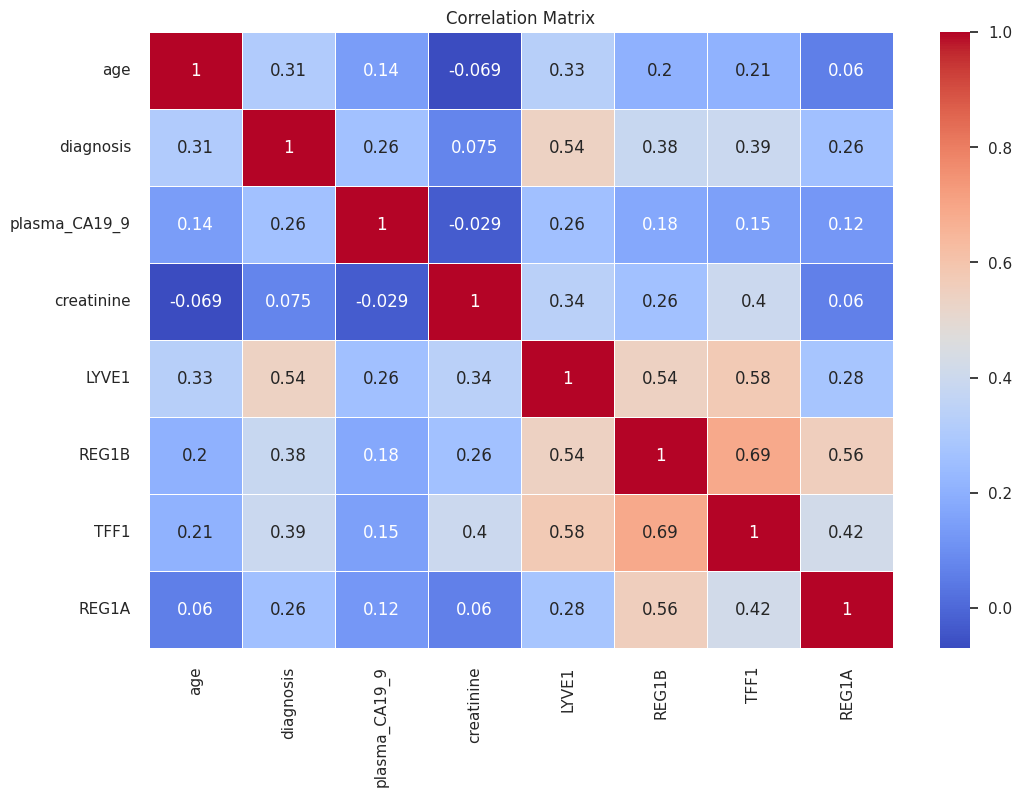

In [24]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Including non numeric coloumns

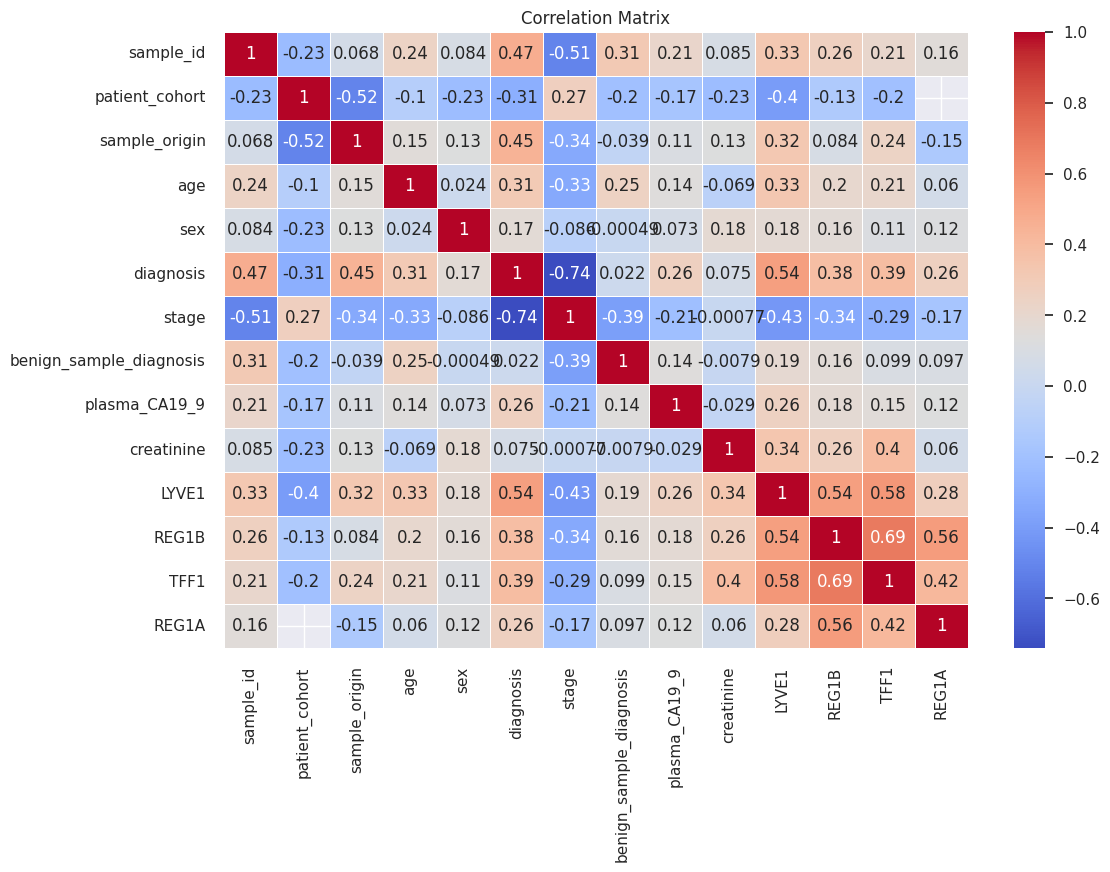

In [25]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Categorical Feature Analysis

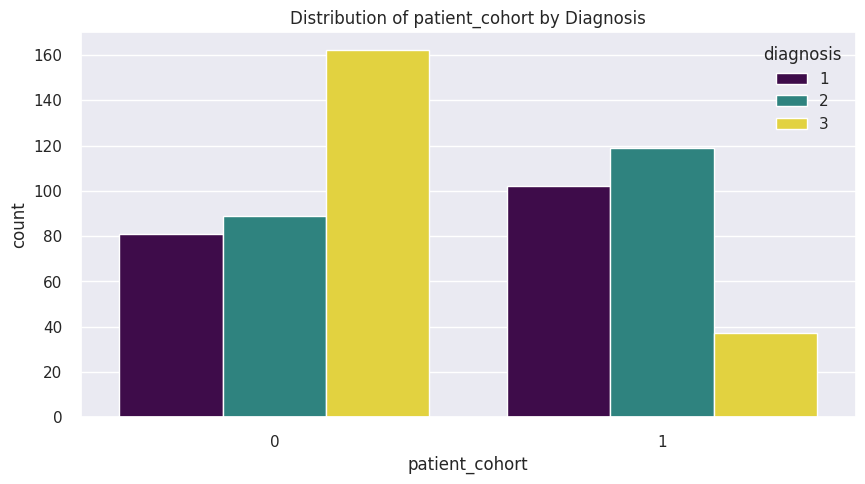

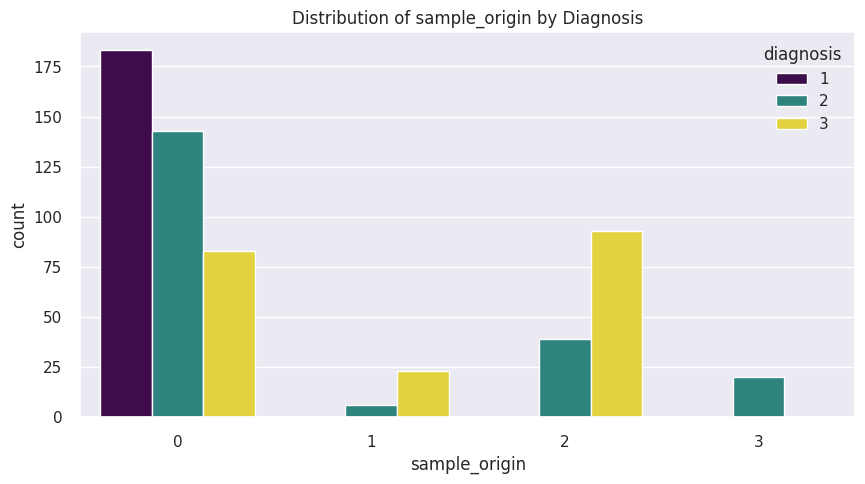

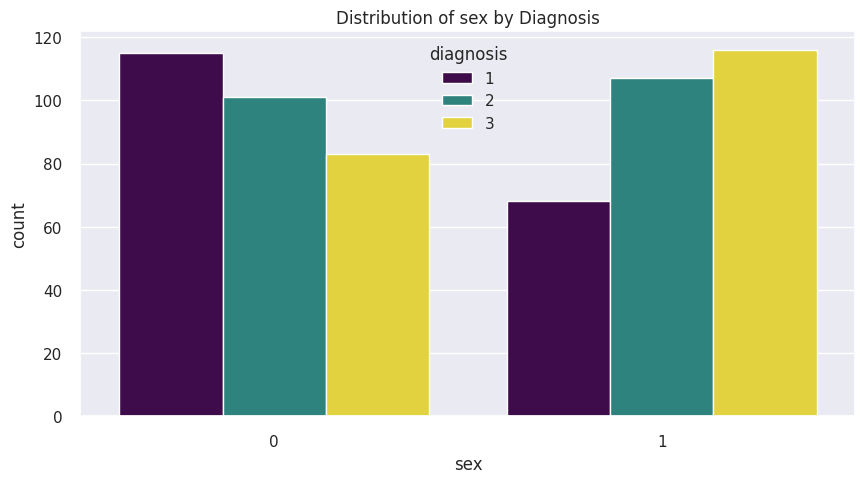

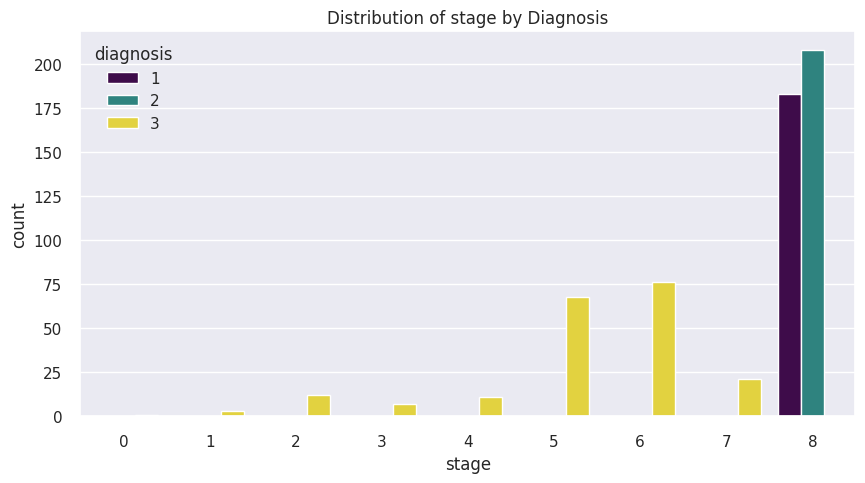

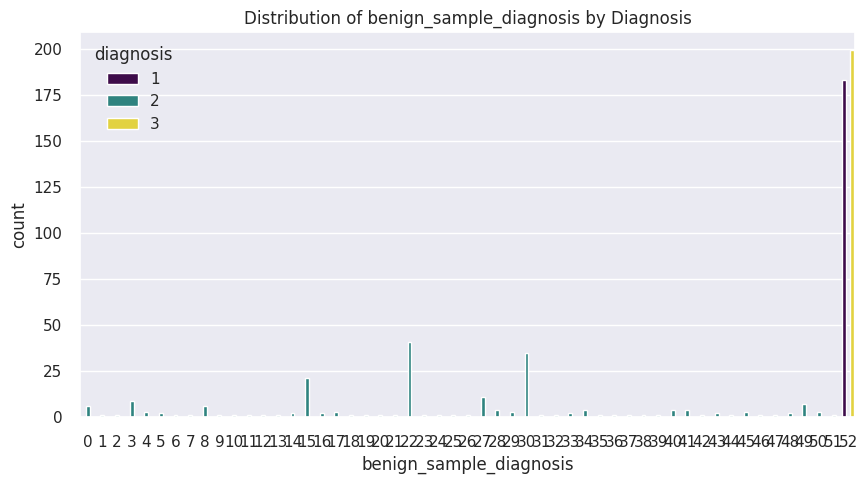

In [26]:
categorical_columns = ['patient_cohort', 'sample_origin', 'sex', 'stage', 'benign_sample_diagnosis']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='diagnosis', palette='viridis')
    plt.title(f'Distribution of {col} by Diagnosis')
    plt.show()


## Data Cleaning/Processing


In [27]:
df.isna().sum()


sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis      0
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [28]:
# Ratio of missing values
round(df.isna().sum()/len(df) * 100, 2)

sample_id                   0.00
patient_cohort              0.00
sample_origin               0.00
age                         0.00
sex                         0.00
diagnosis                   0.00
stage                       0.00
benign_sample_diagnosis     0.00
plasma_CA19_9              40.68
creatinine                  0.00
LYVE1                       0.00
REG1B                       0.00
TFF1                        0.00
REG1A                      48.14
dtype: float64

since we have empty values for important biomarkers we use median to fill up the values of REG1A and plasma_CA19_9
median is used to fill up empty values of a coloumn as Median is a position-based measure, Median-Imputation is a robust technique to handle missing data with outliers. So, I would like to conclude that Mean-Imputation is generally not a recommended practice when your data has extreme values, due to its misleading nature

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    int64  
 1   patient_cohort           590 non-null    int64  
 2   sample_origin            590 non-null    int64  
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    int64  
 5   diagnosis                590 non-null    int64  
 6   stage                    590 non-null    int64  
 7   benign_sample_diagnosis  590 non-null    int64  
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(8)
me

REG1A coloumn filling

In [30]:
df.REG1A.value_counts()


REG1A
0.000        7
137.000      2
64.821       2
1262.000     1
494.080      1
            ..
50.007       1
75.094       1
519.132      1
431.409      1
13200.000    1
Name: count, Length: 298, dtype: int64

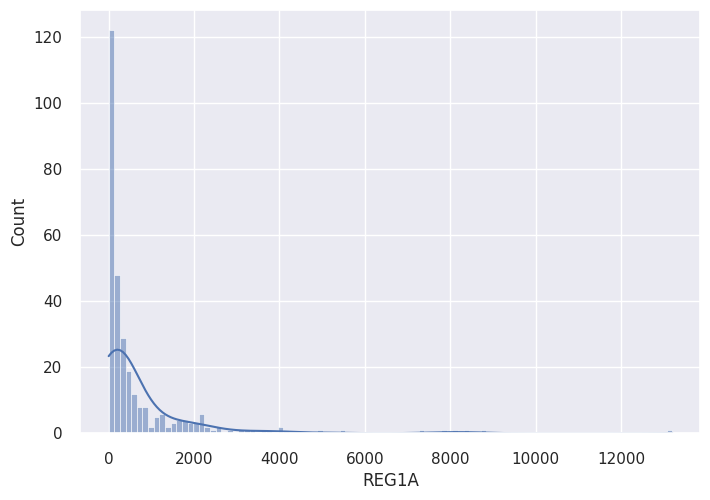

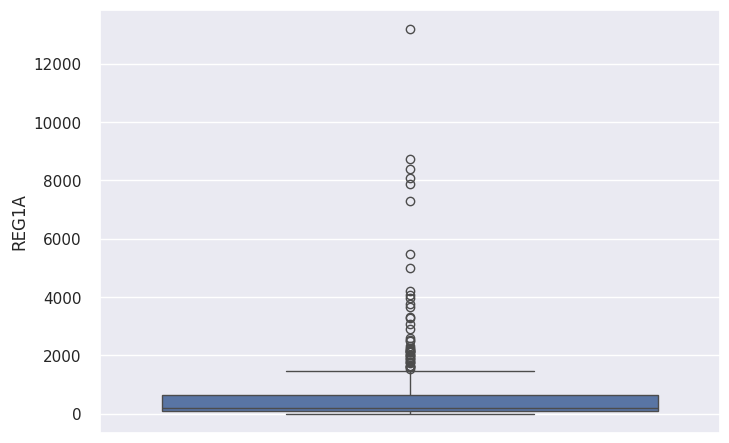

In [31]:
sns.histplot(df.REG1A, kde = True, bins = 100)
plt.show()
sns.boxplot(df.REG1A)
plt.show()

here we can see there are outliers in the dataframe for REG1A coloumn and median is a suitable option to fill in the data values when outliers are present in data

In [32]:
np.mean(df.REG1A), np.nanmedian(df.REG1A)

(735.2812222222221, 208.5385)

In [33]:
df['REG1A'].fillna(value = np.nanmedian(df['REG1A']), inplace=True)

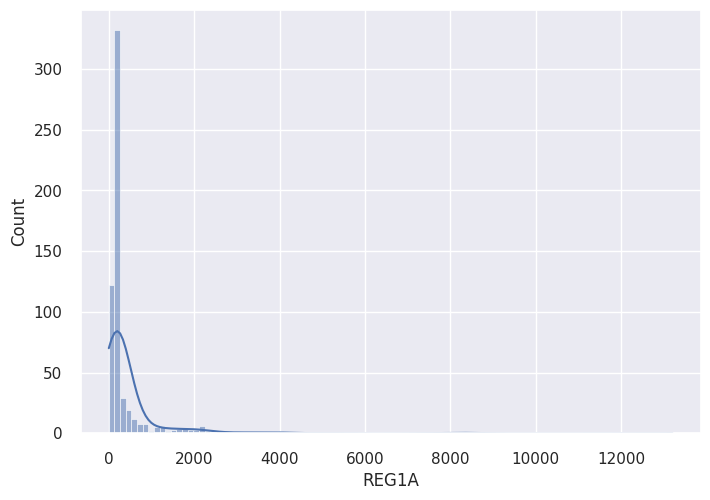

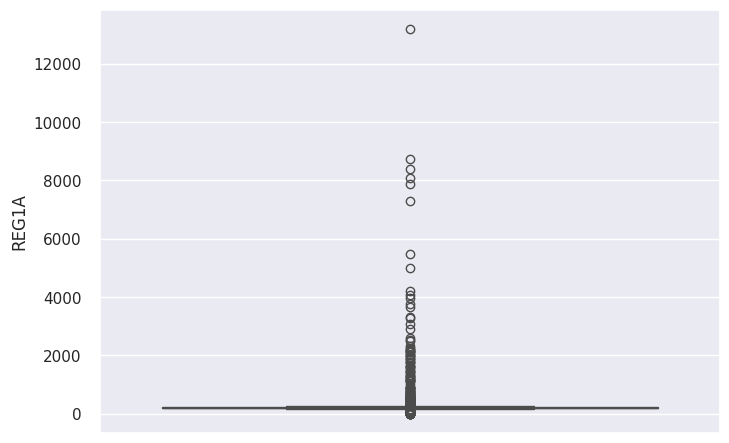

In [34]:
sns.histplot(df.REG1A, kde = True, bins = 100)
plt.show()
sns.boxplot(df.REG1A)
plt.show()

In [37]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                        0
benign_sample_diagnosis      0
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                        0
dtype: int64

hence we have filled the missing data in REG1A coloumn

plasma_CA19_9 coloumn filling

In [38]:
df.plasma_CA19_9.value_counts()

plasma_CA19_9
11.0      8
9.0       8
7.0       6
10.0      5
4.0       5
         ..
263.0     1
1913.0    1
72.0      1
32.0      1
1488.0    1
Name: count, Length: 266, dtype: int64

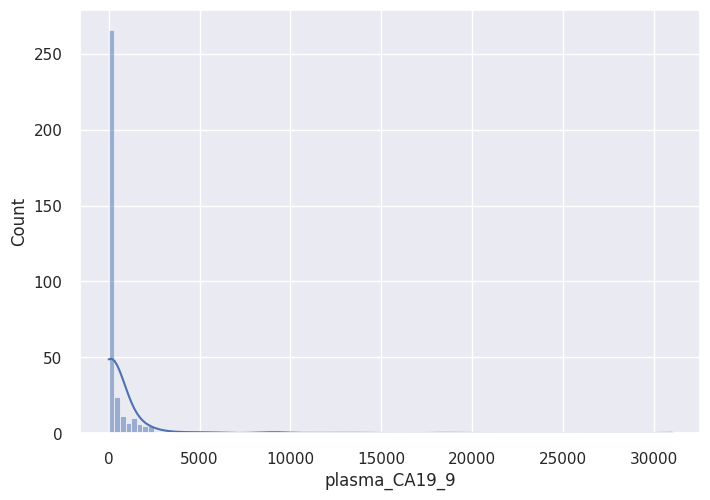

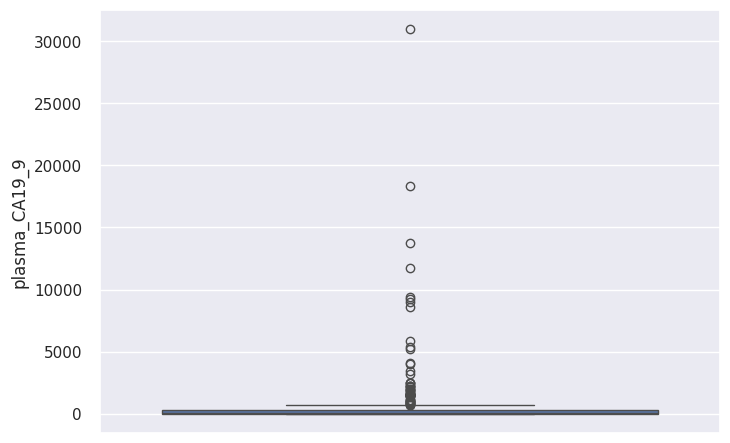

In [39]:
sns.histplot(df.plasma_CA19_9,kde=True,bins=100)
plt.show()
sns.boxplot(df.plasma_CA19_9)
plt.show()

here again outliers are present so we use median as a means to fill our missing data


In [40]:
np.mean(df.plasma_CA19_9),np.nanmedian(df.plasma_CA19_9)

(654.0029437763428, 26.5)

In [41]:
df['plasma_CA19_9'].fillna(value = np.nanmedian(df['plasma_CA19_9']), inplace=True)

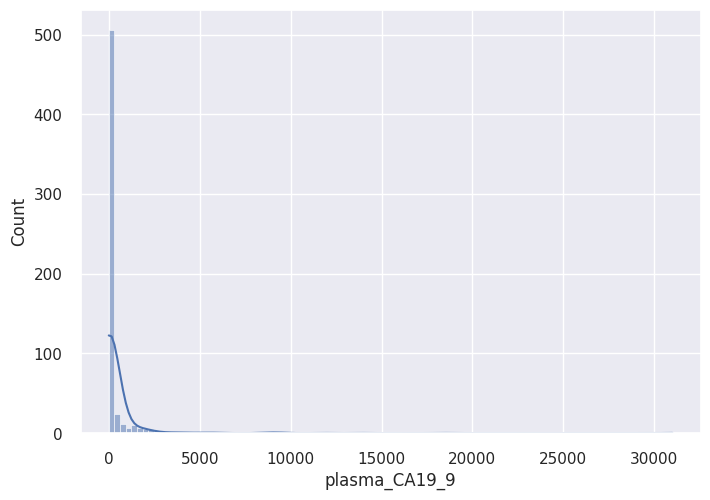

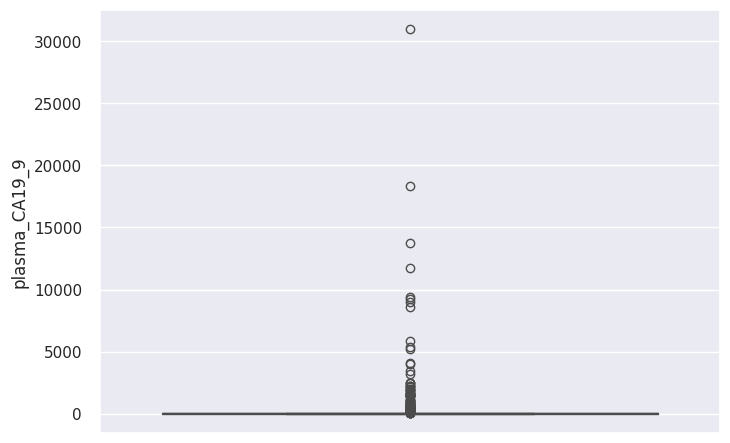

In [42]:
sns.histplot(df.plasma_CA19_9,kde=True,bins=100)
plt.show()
sns.boxplot(df.plasma_CA19_9)
plt.show()

In [43]:
df.isna().sum()

sample_id                  0
patient_cohort             0
sample_origin              0
age                        0
sex                        0
diagnosis                  0
stage                      0
benign_sample_diagnosis    0
plasma_CA19_9              0
creatinine                 0
LYVE1                      0
REG1B                      0
TFF1                       0
REG1A                      0
dtype: int64

hence there are no empty values in the dataframe left

## EDA for cleaned data

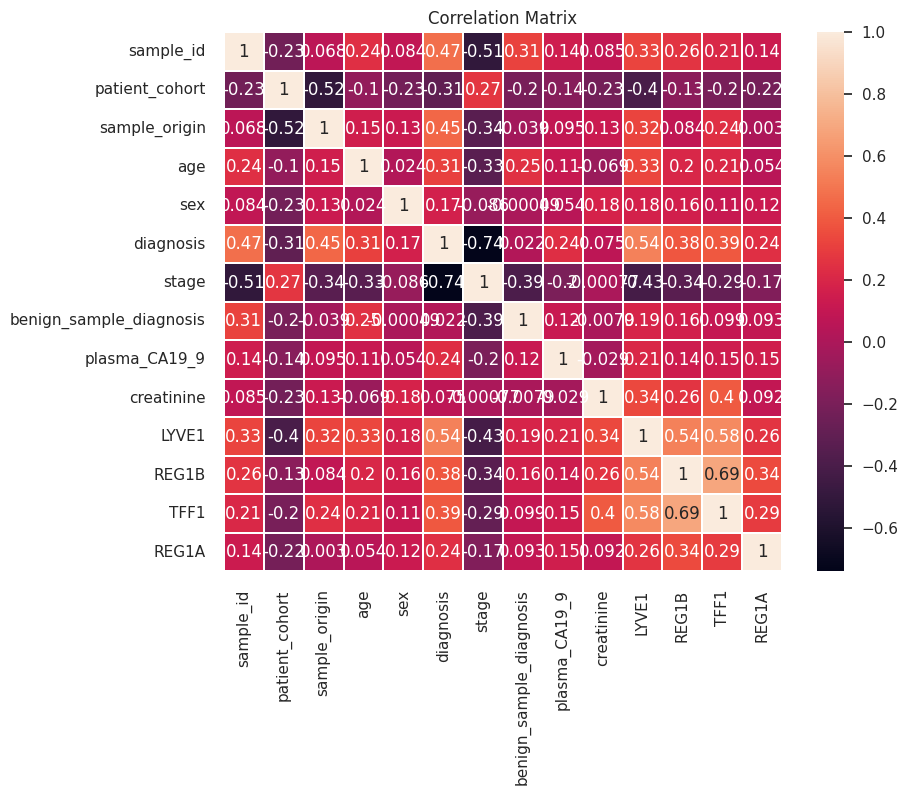

In [44]:
from sklearn.preprocessing import LabelEncoder

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

# Convert non-numeric columns to numeric using LabelEncoder
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.3)
plt.title('Correlation Matrix')
plt.show()

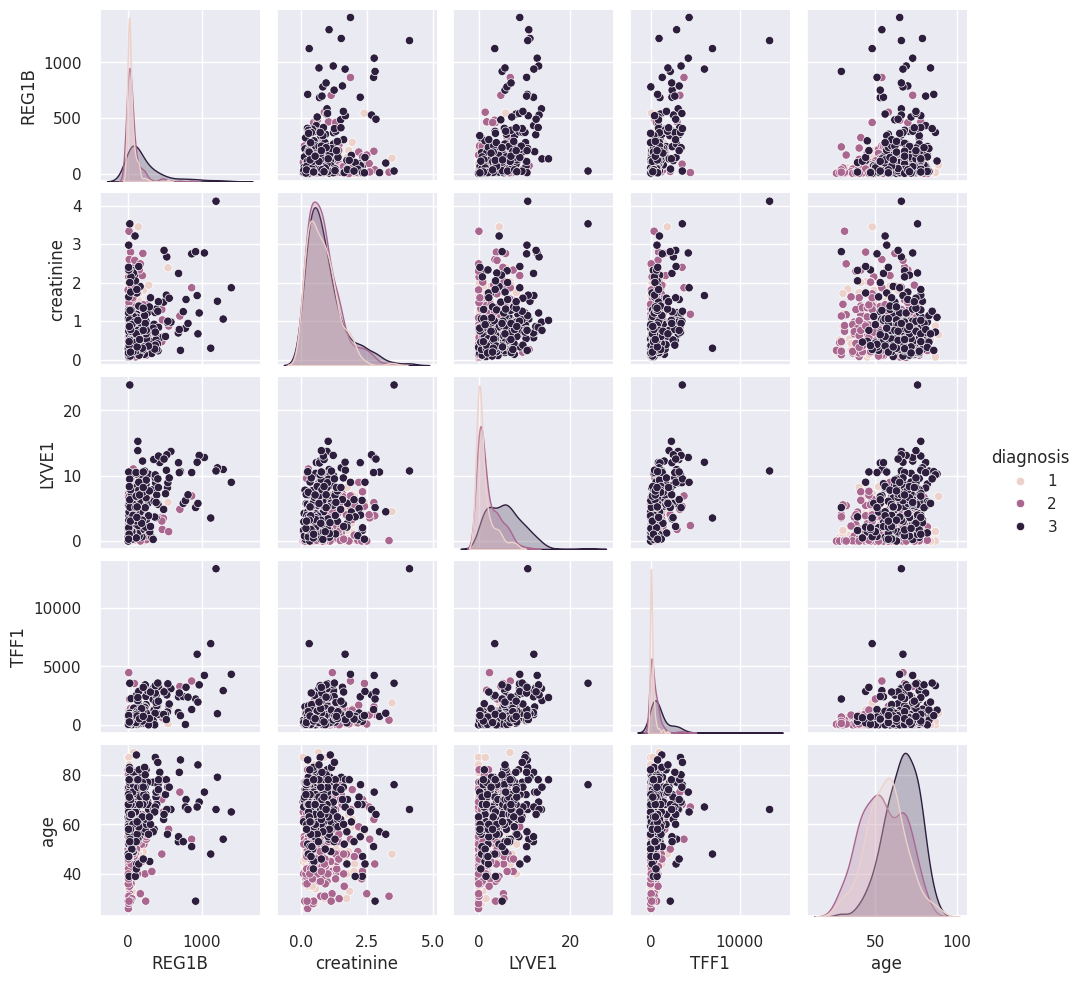

In [45]:
sns.pairplot(data=df, vars=['REG1B', 'creatinine', 'LYVE1', 'TFF1', 'age'], hue='diagnosis', diag_kind='kde', height=2)
plt.show()


## Multiclass model building

In [138]:
s = setup(df, target = 'diagnosis', experiment_name = 'pancreas', session_id = 71,
          ignore_features = ['sample_id','patient_cohort', 'sample_origin','stage','benign_sample_diagnosis','age','sex'], train_size = 0.8)

,Description,Value
0,Session id,71
1,Target,diagnosis
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(590, 14)"
5,Transformed data shape,"(590, 7)"
6,Transformed train set shape,"(472, 7)"
7,Transformed test set shape,"(118, 7)"
8,Ignore features,7
9,Numeric features,6


In [107]:
best = compare_models(n_select = 5,sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7075,0.8598,0.7075,0.7135,0.7065,0.5613,0.5645,0.9430
xgboost,Extreme Gradient Boosting,0.7054,0.8599,0.7054,0.7100,0.7031,0.5576,0.5611,0.2500
gbc,Gradient Boosting Classifier,0.7032,0.0000,0.7032,0.7128,0.7023,0.5544,0.5589,0.4610
rf,Random Forest Classifier,0.6905,0.8550,0.6905,0.6978,0.6913,0.5350,0.5371,0.3690
et,Extra Trees Classifier,0.6883,0.8583,0.6883,0.6963,0.6871,0.5320,0.5361,0.1990
ada,Ada Boost Classifier,0.6501,0.0000,0.6501,0.6622,0.6452,0.4736,0.4802,0.1380
knn,K Neighbors Classifier,0.6315,0.7890,0.6315,0.6436,0.6319,0.4470,0.4511,0.0510
lr,Logistic Regression,0.6227,0.0000,0.6227,0.6357,0.6168,0.4365,0.4456,0.8170
dt,Decision Tree Classifier,0.6100,0.7076,0.6100,0.6249,0.6132,0.4148,0.4174,0.0350
ridge,Ridge Classifier,0.5717,0.0000,0.5717,0.5820,0.5576,0.3599,0.3710,0.0400


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [108]:
print(best[0])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=71, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


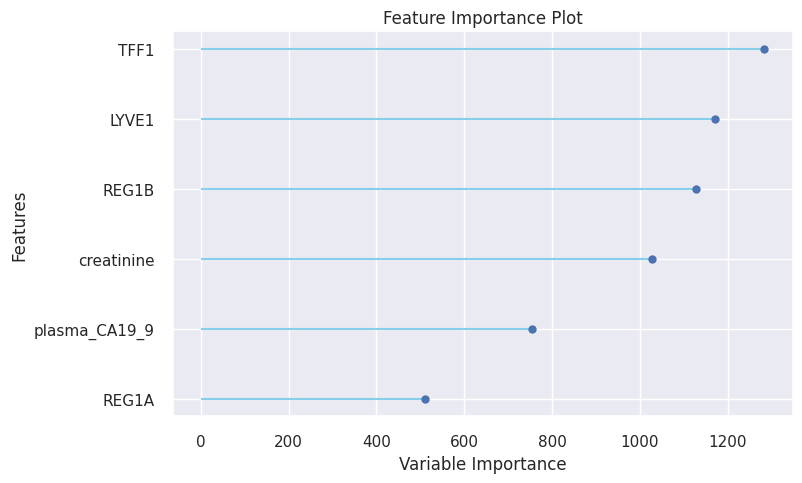

In [109]:
plot_model(best[0], plot = 'feature')

In [110]:
predictions = predict_model(best[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.6610,0.8324,0.6610,0.6687,0.6639,0.4915,0.4922


In [111]:
predictions

,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,diagnosis,prediction_label,prediction_score
81,1.983554,0.14703,0.000129,6.424855,0.129430,NaN,1,1,0.9986
483,NaN,0.09048,2.959210,29.138000,209.675995,NaN,3,3,0.8216
376,52.000000,0.37323,0.592490,19.716000,207.645996,NaN,2,2,0.9362
314,10.000000,0.20358,0.680099,54.456001,159.966003,NaN,2,2,0.7965
418,1972.000000,0.83694,1.406857,13.618654,431.725952,27.737000,3,3,0.9635
...,...,...,...,...,...,...,...,...,...
356,41.000000,0.33930,0.001357,0.293000,73.736000,NaN,2,2,0.8858
419,1004.000000,1.01790,8.776982,150.187317,1050.399536,462.975006,3,3,0.9997
79,0.514003,0.30537,0.005305,7.563690,5.304546,NaN,1,1,0.9994
128,NaN,1.08576,1.079988,10.761000,257.438751,92.726997,1,1,0.9613


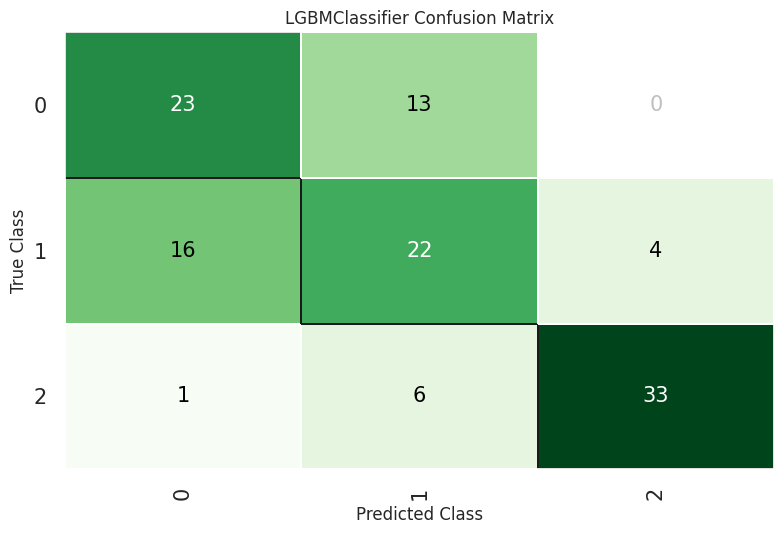

In [112]:
plot_model(best[0], plot = 'confusion_matrix')

There seems to be a good performance based on the high values on the diagonal (23, 22, and 33). These represent correctly classified instances.
There are still some misclassifications indicated by the off-diagonal values.


GENERAL ASSESSMENT:
Yes, it's a good starting point: The high values on the diagonal indicate a good overall performance in correctly classifying most instances.
There's room for improvement: The off-diagonal values suggest some misclassifications are still occurring.
Further analysis can be looked.


## **Binary Model building  (Comparing between Healthy and Diagnosised Data)**

---




In [128]:
import pandas as pd
df1 = pd.read_csv("https://raw.githubusercontent.com/aimanmrkhan/Cancer_Data_Analysis/main/urine%20biomarkers%202020%20data_orginal.csv")
df1

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


We are removing the data of diagnosis as 2 which are not healthy and not cancerous ..thus comparing only beteween healty and cancerous data


In [129]:
df1 = df1[df1['diagnosis'] != 2]
df1

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.948840,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.467030,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.366000,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.579000,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.540000,41.088000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,S549,Cohort2,BPTB,68,M,3,IV,NaN,NaN,0.52026,7.058209,156.241000,525.178000,NaN
586,S558,Cohort2,BPTB,71,F,3,IV,NaN,NaN,0.85956,8.341207,16.915000,245.947000,NaN
587,S560,Cohort2,BPTB,63,M,3,IV,NaN,NaN,1.36851,7.674707,289.701000,537.286000,NaN
588,S583,Cohort2,BPTB,75,F,3,IV,NaN,NaN,1.33458,8.206777,205.930000,722.523000,NaN


In [130]:
df1.diagnosis = df1.diagnosis == 3

In [131]:
features_to_ignore = ['sample_id','patient_cohort', 'sample_origin','stage','benign_sample_diagnosis','age','sex']
s1 = setup(df1, target = 'diagnosis', experiment_name = 'pancreas', session_id = 71, ignore_features = features_to_ignore, train_size = 0.8)

,Description,Value
0,Session id,71
1,Target,diagnosis
2,Target type,Binary
3,Original data shape,"(382, 14)"
4,Transformed data shape,"(382, 7)"
5,Transformed train set shape,"(305, 7)"
6,Transformed test set shape,"(77, 7)"
7,Ignore features,7
8,Numeric features,6
9,Rows with missing values,100.0%


In [132]:
best1 = compare_models(n_select = 5,sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9081,0.9657,0.9050,0.9208,0.9112,0.8157,0.8189,0.9090
gbc,Gradient Boosting Classifier,0.8987,0.9702,0.8988,0.9087,0.9021,0.7970,0.8000,0.2900
xgboost,Extreme Gradient Boosting,0.8888,0.9659,0.8929,0.8962,0.8929,0.7770,0.7801,0.0660
rf,Random Forest Classifier,0.8759,0.9588,0.8929,0.8768,0.8833,0.7509,0.7540,0.2100
et,Extra Trees Classifier,0.8759,0.9646,0.8742,0.8872,0.8790,0.7515,0.7547,0.2170
ada,Ada Boost Classifier,0.8625,0.9276,0.8492,0.8838,0.8649,0.7249,0.7276,0.1290
knn,K Neighbors Classifier,0.8532,0.9197,0.8550,0.8605,0.8562,0.7061,0.7084,0.0500
lr,Logistic Regression,0.8396,0.9136,0.7867,0.8978,0.8364,0.6805,0.6891,0.0480
dt,Decision Tree Classifier,0.8162,0.8166,0.8112,0.8318,0.8196,0.6326,0.6354,0.0330
ridge,Ridge Classifier,0.7902,0.8953,0.6921,0.8844,0.7729,0.5840,0.6028,0.0370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [133]:
print(best1[0])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=71, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


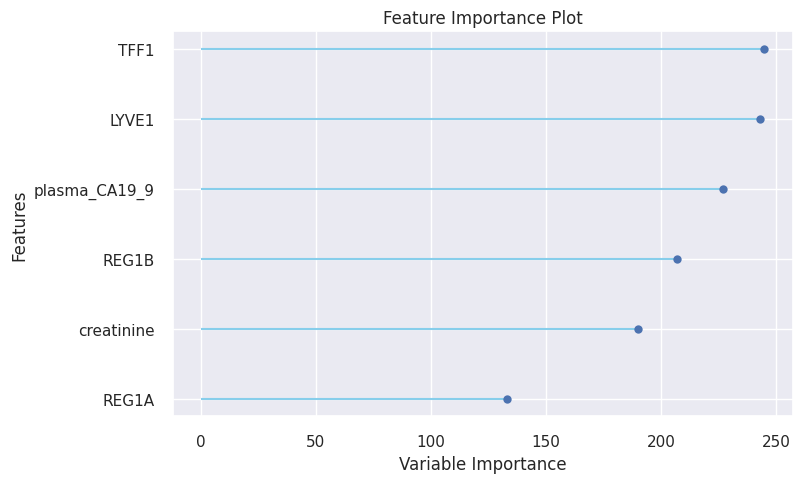

In [134]:
plot_model(best1[0], plot = 'feature')

In [135]:
predictions1 = predict_model(best1[0])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9091,0.9791,0.9250,0.9024,0.9136,0.8177,0.8180


In [136]:
predictions1

,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A,diagnosis,prediction_label,prediction_score
45,NaN,0.61074,0.110311,16.433270,174.522858,103.183998,False,0,0.9985
55,2.116380,0.91611,0.013293,78.470299,13.293490,NaN,False,0,0.9997
531,641.000000,0.89349,5.184534,25.633080,747.793762,96.797997,True,1,0.9975
448,64.000000,0.07917,1.661350,12.580106,384.346497,54.075001,True,1,0.9989
499,859.000000,0.74646,0.316428,65.794464,1194.495972,239.845993,True,0,0.9449
...,...,...,...,...,...,...,...,...,...
48,3.389304,1.26672,0.007114,5.225890,7.113679,NaN,False,0,1.0000
401,NaN,0.71253,1.619339,8.675667,610.899109,NaN,True,1,0.6722
487,936.000000,4.11684,10.733280,1195.972046,13344.299805,NaN,True,1,0.9794
423,354.000000,0.15834,0.242210,34.981377,17.851040,2488.000000,True,0,0.6692


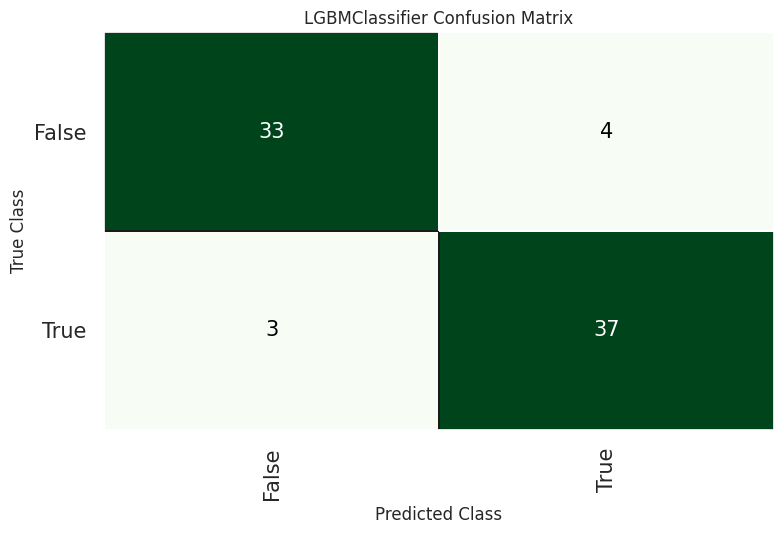

In [137]:
plot_model(best1[0], plot = 'confusion_matrix')

There seems to be a good performance based on the high values on the diagonal (23, 22, and 33). These represent correctly classified instances.
There are still some misclassifications indicated by the off-diagonal values.


GENERAL ASSESSMENT:
Based on the confusion matrix, the model shows promising signs of good performance.


## CONCLUSION


Our two models in the last section achieve a respectable overall classification score but still have some false negatives.
Prediction seems good for the Binary Model and also accurcy is 90%
however drawback is nonhealthy and noncancerous data is not considered


##FURTHER SCOPE:

The best way forward could be to develop the multiclass approach further with feature engineering and a more sophisticated strategy to replace the missing values.
A bigger data size will also be a good starting point for further investigation.
